In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from alg_functions import *

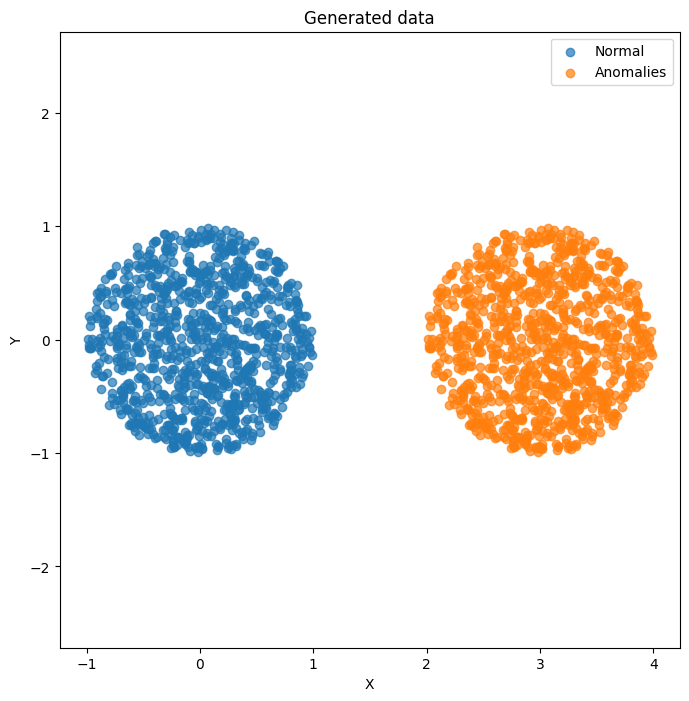

In [2]:
n_points = 1000
radius = 1
center1 = (0, 0)  # Center of the first circle
center2 = (3, 0)  # Center of the second circle 
normal, anomalies = generate_non_overlapping_circular_data(n_points, radius, center1, center2)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(normal[:, 0], normal[:, 1], alpha=0.7, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], alpha=0.7, label='Anomalies')
plt.title('Generated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

Awaystep generated data

In [3]:
epsilon = 0.001

center_AS_gd, radius_AS_gd, count_iterations_AS_gd, CPU_time_AS_gd, dual_val_list_AS_gd, dual_gap_list_AS_gd = frankWolfe_AwayStep(normal, epsilon, max_iterations=1000, step_size= "Exact")

Center: [-0.00292594 -0.00273301]
Radius: 0.9969611797921817
Iterations: 348
CPU time: 7.140855550765991
Set Size: 5


In [4]:
print("Center: ", radius_AS_gd)

Center:  0.9969611797921817


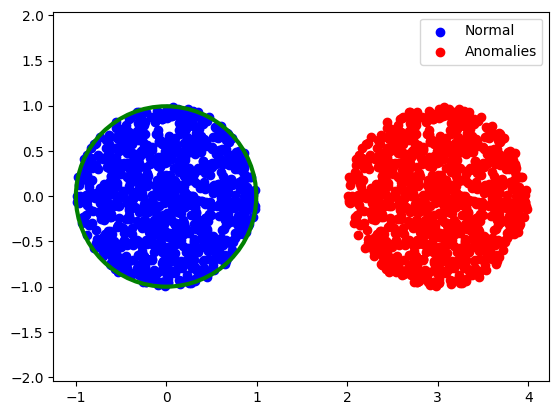

In [5]:
fig, ax = plt.subplots()

# Scatter plot for normal data points and anomalies
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

# Create and add the circle patch
circle = plt.Circle(tuple(center_AS_gd), radius_AS_gd, color='g', fill=False, linewidth=3)
ax.add_patch(circle)

# Set plot properties
plt.axis('equal')
plt.legend()

# Display the plot
plt.show()

Pairwise generated data

In [6]:
epsilon = 0.001

center_PWF_gd, radius_PWF_gd, count_iterations_PWF_gd, CPU_time_PWF_gd, dual_val_list_PWF_gd, dual_gap_list_PWF_gd = frankWolfe_Pairwise(normal, epsilon, max_iterations= 1000, step_size="Exact")

print("CENTER: ", center_PWF_gd)
print("RADIUS: ", radius_PWF_gd)
print("COUNT ITERATIONS: ", count_iterations_PWF_gd)
print("TOTAL TIME: ", CPU_time_PWF_gd)

Center: [-0.00288109 -0.00305073]
Radius: 0.9972737066046085
Iterations: 515
CPU time: 12.11209487915039
Set Size: 3
CENTER:  [-0.00288109 -0.00305073]
RADIUS:  0.9972737066046085
COUNT ITERATIONS:  515
TOTAL TIME:  12.11209487915039


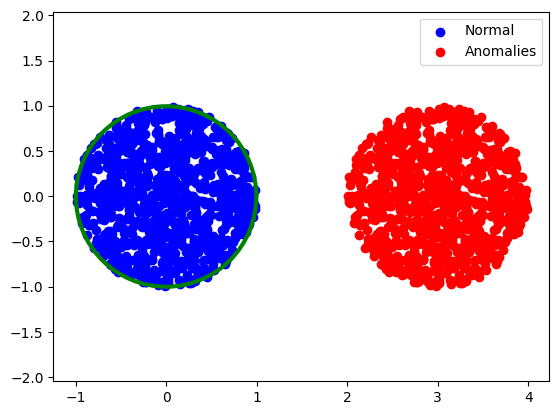

In [7]:
fig, ax = plt.subplots()

# Scatter plot for normal data points and anomalies
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

# Create and add the circle patch
circle = plt.Circle(tuple(center_PWF_gd), radius_PWF_gd, color='g', fill=False, linewidth=3)
ax.add_patch(circle)

# Set plot properties
plt.axis('equal')
plt.legend()

# Display the plot
plt.show()

AwayStep with 2 variables

In [8]:
from astroML.datasets import fetch_rrlyrae_combined

X, y = fetch_rrlyrae_combined()

X = X[-5000:]
y = y[-5000:]

stars = (y == 0)
rrlyrae = (y == 1)

# Create a DataFrame from the array X
df = pd.DataFrame(X[:,0:2], columns=['u-g', 'g-r'])

# Add the array y as a new column to the DataFrame
df['type'] = np.where(y==0, 'stars', 'RR-Lyrae')

pred_columns_lyrae = ['u-g', 'g-r']

display(df.head())

,u-g,g-r,type
0,1.028999,0.379000,stars
1,0.945000,0.305000,stars
2,1.118000,0.396000,stars
3,0.962000,0.375000,stars
4,1.052000,0.335001,stars


In [9]:
# we supply: A, epsilon, max_iterations=1000
A = df[df['type']=='RR-Lyrae'][['u-g', 'g-r']].values
epsilon = 0.001

center_AS, radius_AS, count_iterations_AS, CPU_time_AS, dual_val_list_AS, dual_gap_list_AS = frankWolfe_AwayStep(A, epsilon, max_iterations=1000, step_size  = "Exact")

print("CENTER: ", center_AS)
print("RADIUS: ", radius_AS)
print("COUNT ITERATIONS: ", count_iterations_AS)
print("TOTAL TIME: ", CPU_time_AS)

Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.06537151336669922
Set Size: 2
CENTER:  [1.09449911 0.11800003]
RADIUS:  0.21787044263440536
COUNT ITERATIONS:  8
TOTAL TIME:  0.06537151336669922


In [10]:
pred_columns = ['u-g', 'g-r']

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS

positive_class = b'ab'
negative_class = b'c '
measure_accuracy(negative_class, positive_class, df)


,Metric,Count
0,True Positive (TP),0
1,False Negative (FN),0
2,True Negative (TN),0
3,False Positive (FP),0
4,Precision,0
5,Recall,0
6,F1 Score,0


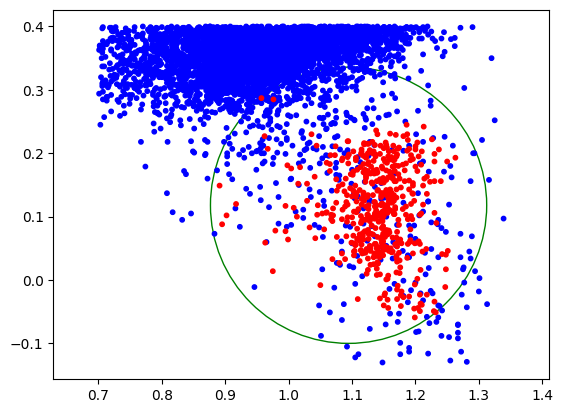

In [11]:
circle = plt.Circle(tuple(center_AS), radius_AS, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

Pairwise with 2 variables

In [12]:
# we supply: A, epsilon, max_iterations=1000
epsilon = 0.001

center_PFW, radius_PFW, count_iterations_PFW, CPU_time_PFW, dual_val_list_PFW, dual_gap_list_PFW = frankWolfe_Pairwise(A, epsilon, max_iterations=1000, step_size="Exact")

print("CENTER: ", center_PFW)
print("RADIUS: ", radius_PFW)
print("COUNT ITERATIONS: ", count_iterations_PFW)
print("TOTAL TIME: ", CPU_time_PFW)


Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.04327869415283203
Set Size: 2
CENTER:  [1.09449911 0.11800003]
RADIUS:  0.21787044263440639
COUNT ITERATIONS:  4
TOTAL TIME:  0.04327869415283203


In [13]:
pred_columns = ['u-g', 'g-r']

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PFW, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW

positive_class = b'ab'
negative_class = b'c '
measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),0
1,False Negative (FN),0
2,True Negative (TN),0
3,False Positive (FP),0
4,Precision,0
5,Recall,0
6,F1 Score,0


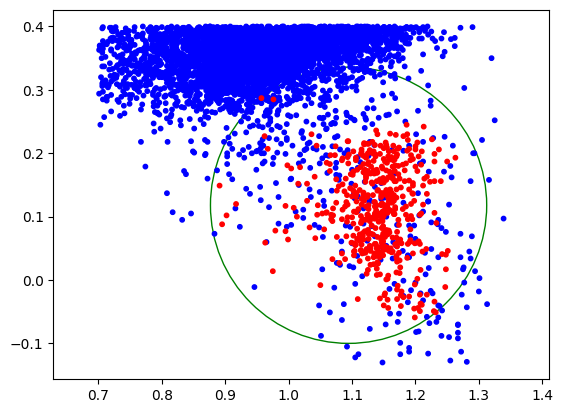

In [14]:
circle = plt.Circle(tuple(center_PFW), radius_PFW, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)

plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

Data imbalance

In [15]:
print(sum((df["type"] == 'RR-Lyrae')) / df["type"].count())
print(sum((df["type"] == 'RR-Lyrae')))
print(sum((df["type"] == 'stars')))

0.0966
483
4517


Using the Full Dataset

In [16]:
Full_dataset = df[df['type'] == 'RR-Lyrae'].drop('type', axis=1).drop("InsideBall", axis = 1).values

Standardized Full Dataset

In [17]:
# Standardize the dataset
Full_dataset_mean = np.mean(Full_dataset, axis=0)
Full_dataset_std = np.std(Full_dataset, axis=0)

Standardized_full_dataset = (Full_dataset - Full_dataset_mean) / Full_dataset_std

Awaystep Full Dataset Harmonic

In [18]:
epsilon = 0.001

center_AS_fdh, radius_AS_fdh, count_iterations_AS_fdh, CPU_time_AS_fdh, dual_val_list_AS_fdh, dual_gap_list_AS_fdh = frankWolfe_AwayStep(Full_dataset, epsilon, max_iterations=1000, step_size  = "Harmonic")

print("CENTER: ", center_AS_fdh)
print("RADIUS: ", radius_AS_fdh)
print("COUNT ITERATIONS: ", count_iterations_AS_fdh)
print("TOTAL TIME: ", CPU_time_AS_fdh)

Center: [1.09308158 0.11974231]
Radius: 0.21785884908914635
Iterations: 97
CPU time: 0.49712610244750977
Set Size: 2
CENTER:  [1.09308158 0.11974231]
RADIUS:  0.21785884908914635
COUNT ITERATIONS:  97
TOTAL TIME:  0.49712610244750977


In [19]:
pred_columns = ['u-g', 'g-r']

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS_fdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_fdh

positive_class = 'RR-Lyrae'
negative_class = 'stars'
measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),4040.000000
3,False Positive (FP),477.000000
4,Precision,0.502607
5,Recall,0.997930
6,F1 Score,0.668516


Text(0, 0.5, 'Function value')

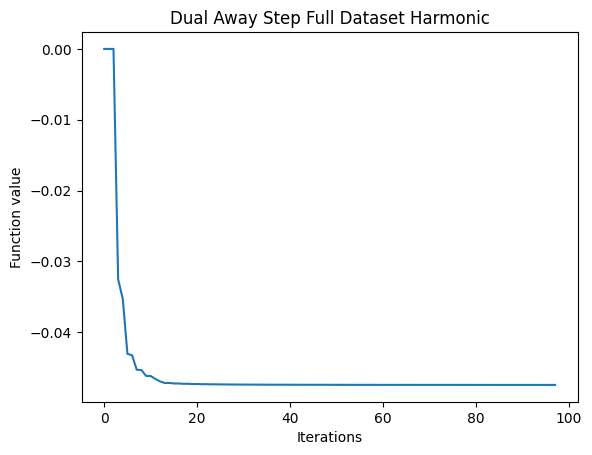

In [20]:
plt.plot(dual_val_list_AS_fdh)
plt.title('Dual Away Step Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

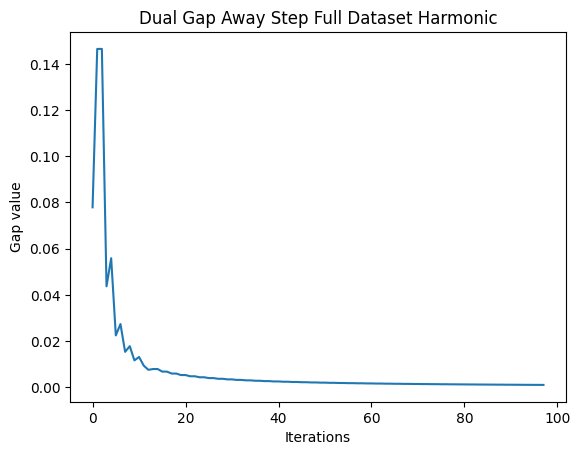

In [21]:
plt.plot(dual_gap_list_AS_fdh)
plt.title('Dual Gap Away Step Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Standardized Full Dataset Harmonic

In [22]:
epsilon = 0.001

center_AS_sdh, radius_AS_sdh, count_iterations_AS_sdh, CPU_time_AS_sdh, dual_val_list_AS_sdh, dual_gap_list_AS_sdh = frankWolfe_AwayStep(Standardized_full_dataset, epsilon, max_iterations=1000, step_size="Harmonic")

print("CENTER: ", center_AS_sdh)
print("RADIUS: ", radius_AS_sdh)
print("COUNT ITERATIONS: ", count_iterations_AS_sdh)
print("TOTAL TIME: ", CPU_time_AS_sdh)

Center: [-1.03477079 -0.13623195]
Radius: 3.5729827616191616
Iterations: 1000
CPU time: 4.977371692657471
Set Size: 3
CENTER:  [-1.03477079 -0.13623195]
RADIUS:  3.5729827616191616
COUNT ITERATIONS:  1000
TOTAL TIME:  4.977371692657471


In [23]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_AS_sdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sdh

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),3970.000000
3,False Positive (FP),547.000000
4,Precision,0.467899
5,Recall,0.995859
6,F1 Score,0.636664


Text(0, 0.5, 'Function value')

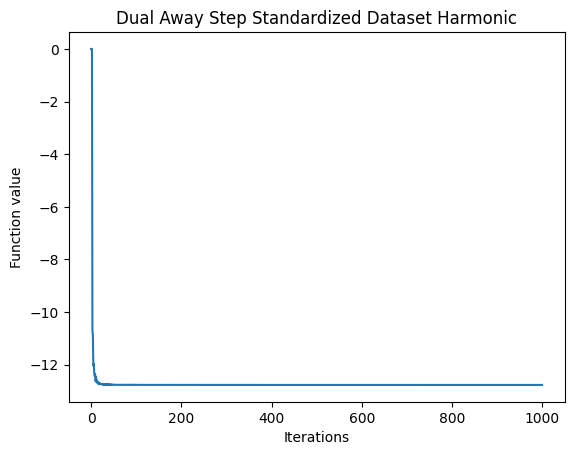

In [24]:
plt.plot(dual_val_list_AS_sdh)
plt.title('Dual Away Step Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

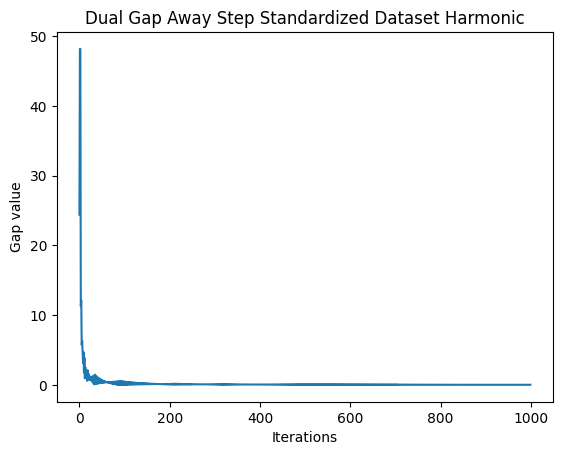

In [25]:
plt.plot(dual_gap_list_AS_sdh)
plt.title('Dual Gap Away Step Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Full Dataset Armijo

In [26]:
epsilon = 0.001

center_AS_fda, radius_AS_fda, count_iterations_AS_fda, CPU_time_AS_fda, dual_val_list_AS_fda, dual_gap_list_AS_fda = frankWolfe_AwayStep(Full_dataset, epsilon, max_iterations=1000, step_size="Armijo")

print("CENTER: ", center_AS_fda)
print("RADIUS: ", radius_AS_fda)
print("COUNT ITERATIONS: ", count_iterations_AS_fda)
print("TOTAL TIME: ", CPU_time_AS_fda)

Center: [1.0996599  0.11225328]
Radius: 0.17756083142297174
Iterations: 1000
CPU time: 51.15116834640503
Set Size: 5
CENTER:  [1.0996599  0.11225328]
RADIUS:  0.17756083142297174
COUNT ITERATIONS:  1000
TOTAL TIME:  51.15116834640503


In [27]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS_fda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_fda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),464.000000
1,False Negative (FN),19.000000
2,True Negative (TN),4293.000000
3,False Positive (FP),224.000000
4,Precision,0.674419
5,Recall,0.960663
6,F1 Score,0.792485


Text(0, 0.5, 'Function value')

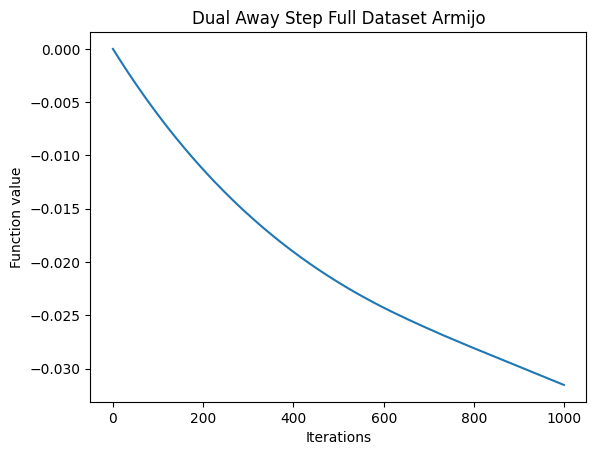

In [28]:
plt.plot(dual_val_list_AS_fda)
plt.title('Dual Away Step Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

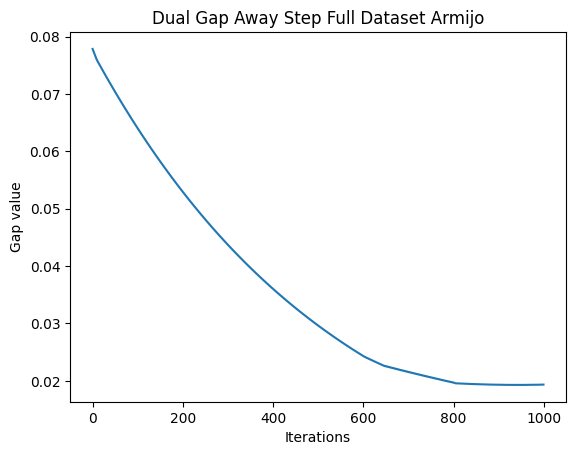

In [29]:
plt.plot(dual_gap_list_AS_fda)
plt.title('Dual Gap Away Step Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Standardized Dataset Armijo

In [30]:
epsilon = 0.001

center_AS_sda, radius_AS_sda, count_iterations_AS_sda, CPU_time_AS_sda, dual_val_list_AS_sda, dual_gap_list_AS_sda = frankWolfe_AwayStep(Standardized_full_dataset, epsilon, max_iterations=1000, step_size="Armijo")

print("CENTER: ", center_AS_sda)
print("RADIUS: ", radius_AS_sda)
print("COUNT ITERATIONS: ", count_iterations_AS_sda)
print("TOTAL TIME: ", CPU_time_AS_sda)

Center: [-1.01625654 -0.14927252]
Radius: 3.5728645097643663
Iterations: 1000
CPU time: 36.61312818527222
Set Size: 3
CENTER:  [-1.01625654 -0.14927252]
RADIUS:  3.5728645097643663
COUNT ITERATIONS:  1000
TOTAL TIME:  36.61312818527222


In [31]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_AS_sda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),3987.000000
3,False Positive (FP),530.000000
4,Precision,0.476285
5,Recall,0.997930
6,F1 Score,0.644816


Text(0, 0.5, 'Function value')

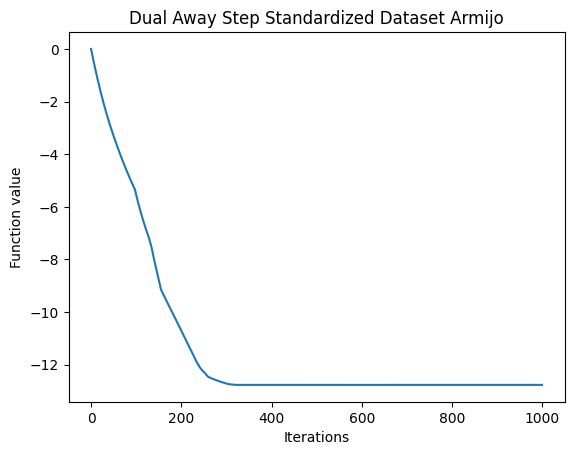

In [32]:
plt.plot(dual_val_list_AS_sda)
plt.title('Dual Away Step Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

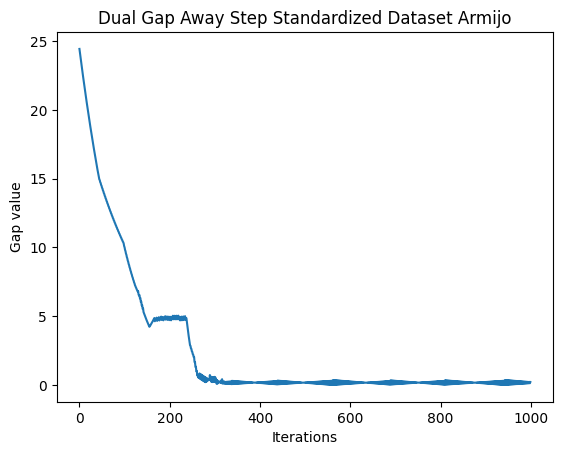

In [33]:
plt.plot(dual_gap_list_AS_sda)
plt.title('Dual Gap Away Step Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Full Dataset Harmonic

In [34]:
epsilon = 0.001

center_PFW_fdh, radius_PFW_fdh, count_iterations_PFW_fdh, CPU_time_PFW_fdh, dual_val_list_PFW_fdh, dual_gap_list_PFW_fdh = frankWolfe_Pairwise(Full_dataset, epsilon, max_iterations=1000, step_size  = "Harmonic")

print("CENTER: ", center_PFW_fdh)
print("RADIUS: ", radius_PFW_fdh)
print("COUNT ITERATIONS: ", count_iterations_PFW_fdh)
print("TOTAL TIME: ", CPU_time_PFW_fdh)

Center: [1.09493497 0.11746432]
Radius: 0.21786934514627482
Iterations: 41
CPU time: 0.28032970428466797
Set Size: 2
CENTER:  [1.09493497 0.11746432]
RADIUS:  0.21786934514627482
COUNT ITERATIONS:  41
TOTAL TIME:  0.28032970428466797


In [35]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PFW_fdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_fdh

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),4067.000000
3,False Positive (FP),450.000000
4,Precision,0.517167
5,Recall,0.997930
6,F1 Score,0.681272


Text(0, 0.5, 'Function value')

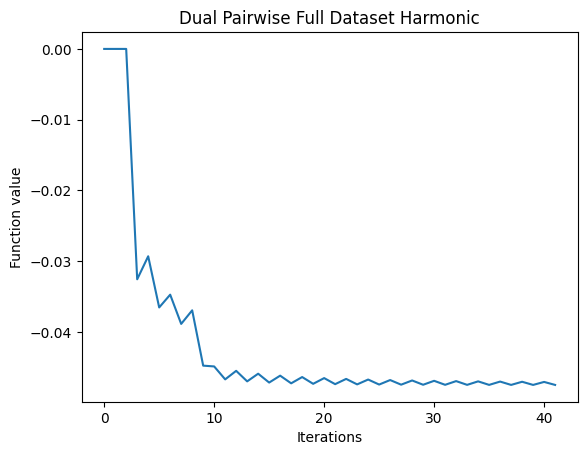

In [36]:
plt.plot(dual_val_list_PFW_fdh)
plt.title('Dual Pairwise Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

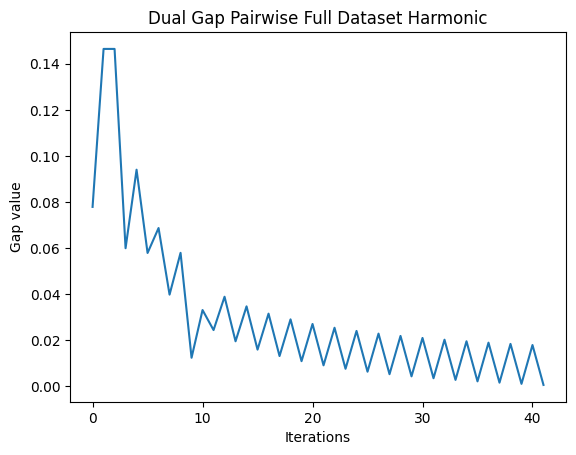

In [37]:
plt.plot(dual_gap_list_PFW_fdh)
plt.title('Dual Gap Pairwise Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Standardized Dataset Harmonic

In [38]:
epsilon = 0.001

center_PFW_sdh, radius_PFW_sdh, count_iterations_PFW_sdh, CPU_time_PFW_sdh, dual_val_list_PFW_sdh, dual_gap_list_PFW_sdh = frankWolfe_Pairwise(Standardized_full_dataset, epsilon, max_iterations=1000, step_size  = "Harmonic")

print("CENTER: ", center_PFW_sdh)
print("RADIUS: ", radius_PFW_sdh)
print("COUNT ITERATIONS: ", count_iterations_PFW_sdh)
print("TOTAL TIME: ", CPU_time_PFW_sdh)

Center: [-1.03241705 -0.13538554]
Radius: 3.572985838231801
Iterations: 110
CPU time: 0.5796463489532471
Set Size: 3
CENTER:  [-1.03241705 -0.13538554]
RADIUS:  3.572985838231801
COUNT ITERATIONS:  110
TOTAL TIME:  0.5796463489532471


In [39]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_PFW_sdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_sdh

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),3970.000000
3,False Positive (FP),547.000000
4,Precision,0.468416
5,Recall,0.997930
6,F1 Score,0.637566


Text(0, 0.5, 'Function value')

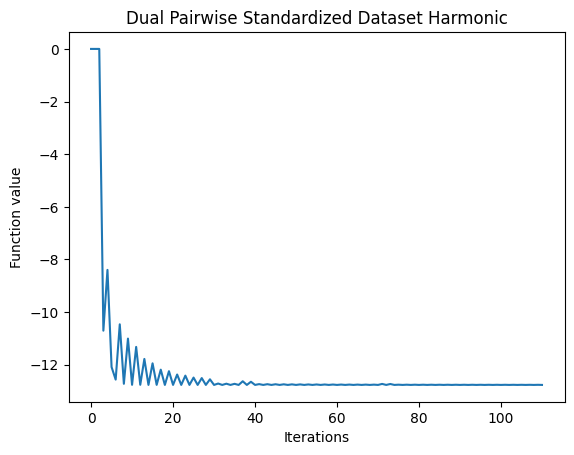

In [40]:
plt.plot(dual_val_list_PFW_sdh)
plt.title('Dual Pairwise Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

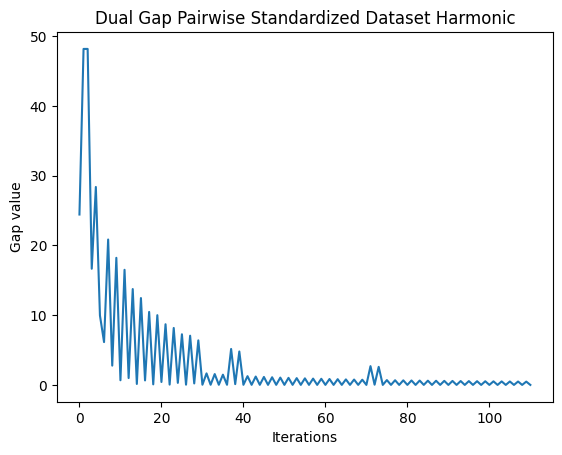

In [41]:
plt.plot(dual_gap_list_PFW_sdh)
plt.title('Dual Gap Pairwise Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Full Dataset Armijo

In [42]:
epsilon = 0.001

center_PFW_fda, radius_PFW_fda, count_iterations_PFW_fda, CPU_time_PFW_fda, dual_val_list_PFW_fda, dual_gap_list_PFW_fda = frankWolfe_Pairwise(Full_dataset, epsilon, max_iterations=1000, step_size  = "Armijo")

print("CENTER: ", center_PFW_fda)
print("RADIUS: ", radius_PFW_fda)
print("COUNT ITERATIONS: ", count_iterations_PFW_fda)
print("TOTAL TIME: ", CPU_time_PFW_fda)

Center: [1.07467744 0.10162585]
Radius: 0.20235280556677304
Iterations: 1000
CPU time: 48.16705060005188
Set Size: 5
CENTER:  [1.07467744 0.10162585]
RADIUS:  0.20235280556677304
COUNT ITERATIONS:  1000
TOTAL TIME:  48.16705060005188


In [43]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PFW_fda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_fda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),475.000000
1,False Negative (FN),8.000000
2,True Negative (TN),4213.000000
3,False Positive (FP),304.000000
4,Precision,0.609756
5,Recall,0.983437
6,F1 Score,0.752773


Text(0, 0.5, 'Function value')

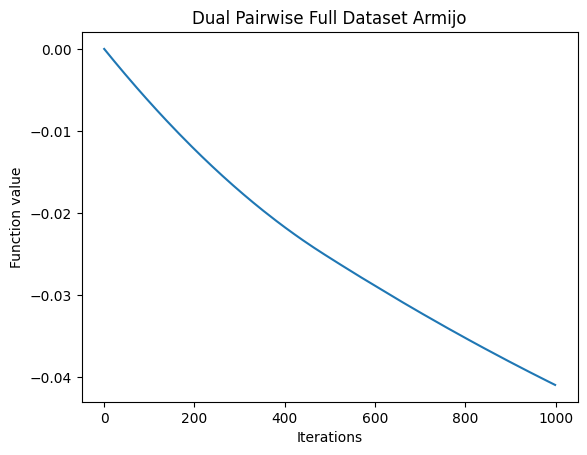

In [44]:
plt.plot(dual_val_list_PFW_fda)
plt.title('Dual Pairwise Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

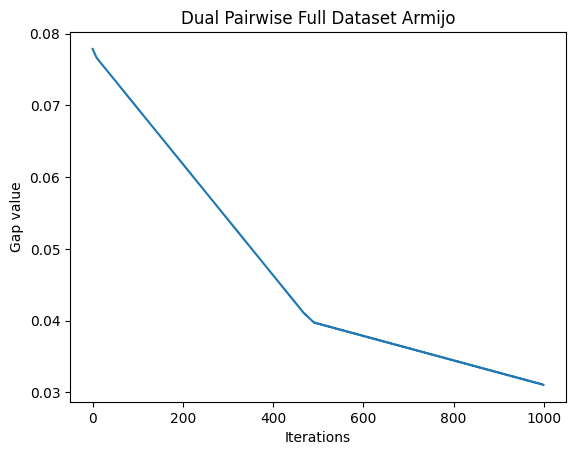

In [45]:
plt.plot(dual_gap_list_PFW_fda)
plt.title('Dual Pairwise Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Standardized Dataset Armijo

In [46]:
epsilon = 0.001

center_PFW_sda, radius_PFW_sda, count_iterations_PFW_sda, CPU_time_PFW_sda, dual_val_list_PFW_sda, dual_gap_list_PFW_sda = frankWolfe_Pairwise(Standardized_full_dataset, epsilon, max_iterations=1000, step_size  = "Armijo")

print("CENTER: ", center_PFW_sda)
print("RADIUS: ", radius_PFW_sda)
print("COUNT ITERATIONS: ", count_iterations_PFW_sda)
print("TOTAL TIME: ", CPU_time_PFW_sda)

Center: [-1.03250331 -0.10299536]
Radius: 3.572933190959087
Iterations: 1000
CPU time: 34.88565135002136
Set Size: 3
CENTER:  [-1.03250331 -0.10299536]
RADIUS:  3.572933190959087
COUNT ITERATIONS:  1000
TOTAL TIME:  34.88565135002136


In [47]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_PFW_sda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_sda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),3938.000000
3,False Positive (FP),579.000000
4,Precision,0.454288
5,Recall,0.997930
6,F1 Score,0.624352


Text(0, 0.5, 'Function value')

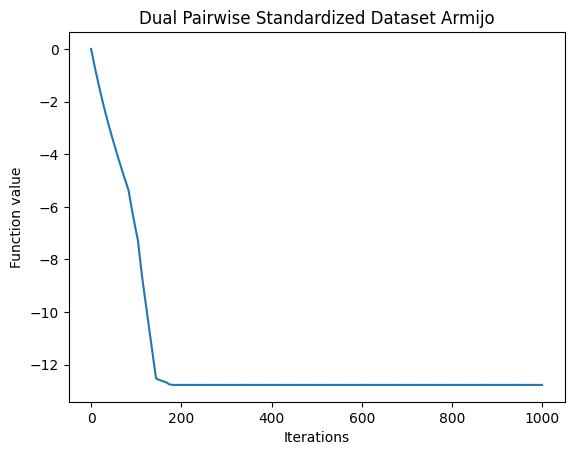

In [48]:
plt.plot(dual_val_list_PFW_sda)
plt.title('Dual Pairwise Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

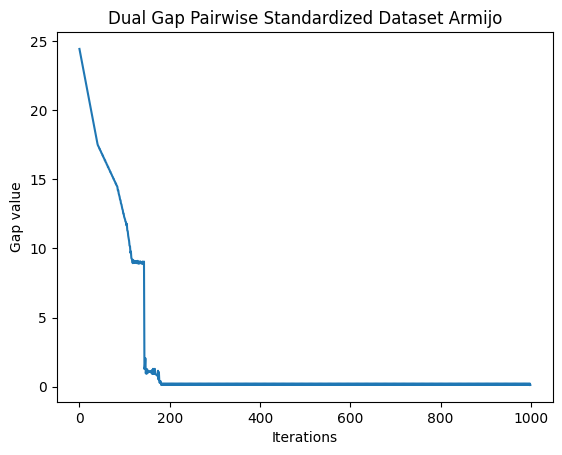

In [49]:
plt.plot(dual_gap_list_PFW_sda)
plt.title('Dual Gap Pairwise Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Full Dataset Exact Line Search

In [50]:
epsilon = 0.001

center_AS_fde, radius_AS_fde, count_iterations_AS_fde, CPU_time_AS_fde, dual_val_list_AS_fde, dual_gap_list_AS_fde = frankWolfe_AwayStep(Full_dataset, epsilon, max_iterations=1000, step_size = "Exact")

print("CENTER: ", center_AS_fde)
print("RADIUS: ", radius_AS_fde)
print("COUNT ITERATIONS: ", count_iterations_AS_fde)
print("TOTAL TIME: ", CPU_time_AS_fde)

Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.06753420829772949
Set Size: 2
CENTER:  [1.09449911 0.11800003]
RADIUS:  0.21787044263440536
COUNT ITERATIONS:  8
TOTAL TIME:  0.06753420829772949


In [51]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS_fde, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_fde

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),4059.000000
3,False Positive (FP),458.000000
4,Precision,0.512247
5,Recall,0.995859
6,F1 Score,0.676512


Text(0, 0.5, 'Function value')

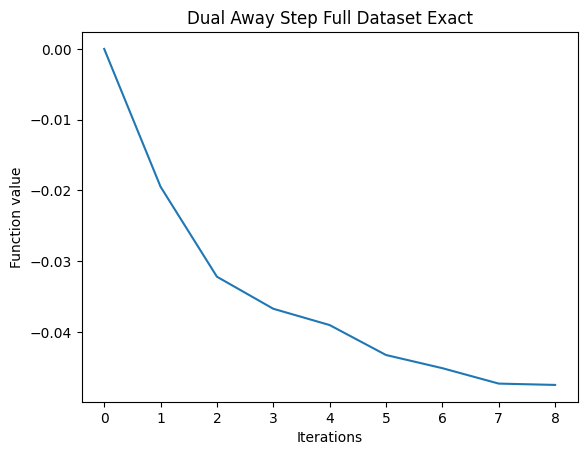

In [52]:
plt.plot(dual_val_list_AS_fde)
plt.title('Dual Away Step Full Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Function value')

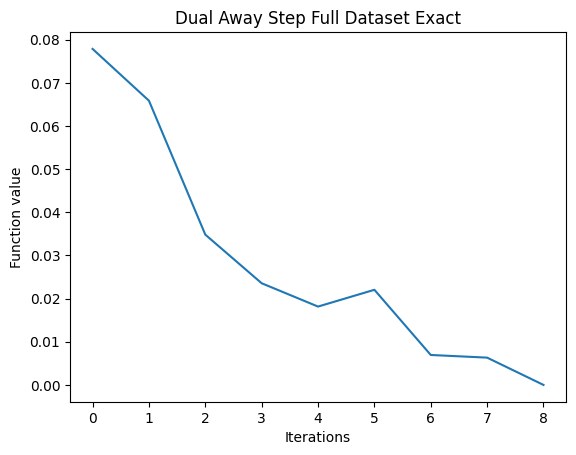

In [53]:
plt.plot(dual_gap_list_AS_fde)
plt.title('Dual Away Step Full Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Awaystep Standardized Dataset Exact Line Search

In [54]:
epsilon = 0.001

center_AS_sde, radius_AS_sde, count_iterations_AS_sde, CPU_time_AS_sde, dual_val_list_AS_sde, dual_gap_list_AS_sde = frankWolfe_AwayStep(Standardized_full_dataset, epsilon, max_iterations=1000, step_size = "Exact")

print("CENTER: ", center_AS_sde)
print("RADIUS: ", radius_AS_sde)
print("COUNT ITERATIONS: ", count_iterations_AS_sde)
print("TOTAL TIME: ", CPU_time_AS_sde)

Center: [-1.03238717 -0.13560492]
Radius: 3.5729858102349907
Iterations: 81
CPU time: 0.5546114444732666
Set Size: 3
CENTER:  [-1.03238717 -0.13560492]
RADIUS:  3.5729858102349907
COUNT ITERATIONS:  81
TOTAL TIME:  0.5546114444732666


In [55]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_AS_sde, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sde

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),3970.000000
3,False Positive (FP),547.000000
4,Precision,0.467899
5,Recall,0.995859
6,F1 Score,0.636664


Text(0, 0.5, 'Function value')

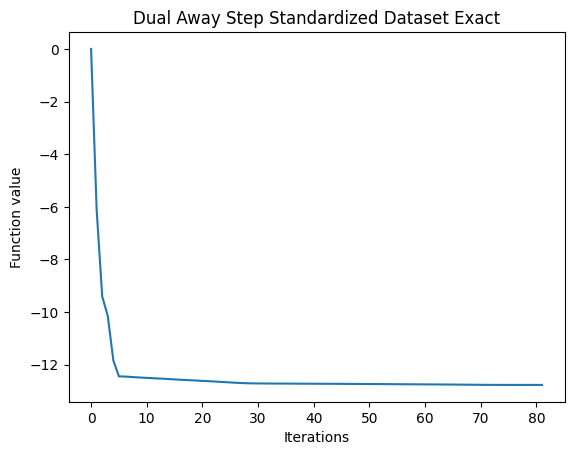

In [56]:
plt.plot(dual_val_list_AS_sde)
plt.title('Dual Away Step Standardized Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Function value')

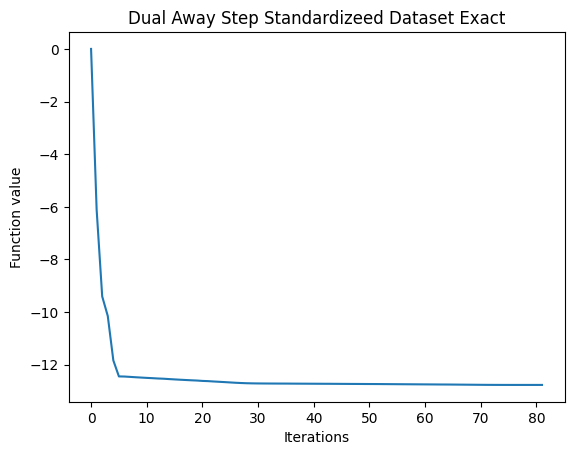

In [57]:
plt.plot(dual_val_list_AS_sde)
plt.title('Dual Away Step Standardizeed Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

# SSDS Quasar-Galaxy Classification

In [58]:
# open the pulsar dataset
qso_g_df = pd.read_csv('datasets/corrected_QSO_GALAXY_Dataset.csv')

# drop the rows with missing values
qso_g_df = qso_g_df.dropna()
qso_g_df.rename(columns={'class': 'type'}, inplace=True)

galaxy_df = qso_g_df[qso_g_df['type'] == 'GALAXY'].sample(n=2000, random_state=42)
qso_df = qso_g_df[qso_g_df['type'] == 'QSO'].sample(n=2000, random_state=42)

qso_g_df = pd.concat([galaxy_df, qso_df])

display(qso_g_df.head())

,type,subclass,mag_u,mag_g,mag_r,mag_i,mag_z,redshift,flux_u,flux_g,...,flux_i,flux_z,photRA,specRA,photDec,specDec,petrosianRadius_u,deVEffectiveRadius_u,petrosianRadius_z,deVEffectiveRadius_z
4498,GALAXY,STARFORMING,20.20175,18.42369,17.36100,16.85209,16.42140,0.116623,4.067745,11.13524,...,51.35847,72.29363,218.563632,218.56364,8.992736,8.992744,2.970685,7.054471,5.191600,2.716197
3646,GALAXY,STARFORMING,19.64754,18.41117,17.75667,17.36501,17.06143,0.073963,3.827840,8.99992,...,29.52955,37.28042,339.559695,339.55971,14.157285,14.157290,43.764050,26.746740,8.903262,10.204720
4242,GALAXY,STARFORMING,19.61266,17.91331,17.00628,16.59109,16.24816,0.107316,6.293722,25.02789,...,96.43300,125.75090,120.833410,120.83341,12.104724,12.104733,8.076633,6.684969,3.399417,1.761480
2464,GALAXY,STARFORMING,18.55299,17.09966,16.39841,16.01200,15.75324,0.066666,18.779910,47.22098,...,135.92570,166.69580,180.117997,180.11801,51.756060,51.756076,5.504677,4.108453,4.365156,2.409809
8715,GALAXY,STARFORMING,16.71037,15.61988,15.25153,15.01981,14.84542,0.027207,18.918650,32.80019,...,72.02156,87.63742,158.926025,158.92608,5.615982,5.615976,17.752350,29.677330,16.224320,28.178960


In [59]:
qso_g_df['u-g'] = qso_g_df['flux_u'] - qso_g_df['flux_g']
qso_g_df['g-r'] = qso_g_df['flux_g'] - qso_g_df['flux_r']
qso_g_df['r-i'] = qso_g_df['flux_r'] - qso_g_df['flux_i']
qso_g_df['i-z'] = qso_g_df['flux_i'] - qso_g_df['flux_z']
qso_g_df['u-z'] = qso_g_df['flux_u'] - qso_g_df['flux_z']
qso_g_df['u-r'] = qso_g_df['flux_u'] - qso_g_df['flux_r']
qso_g_df['r-z'] = qso_g_df['flux_r'] - qso_g_df['flux_z']


pred_columns_qso_g = ['u-z', 'u-r', 'r-z', 'redshift']

In [60]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

qso_g_df_norm = qso_g_df[pred_columns_qso_g]
# fit and transform the data

qso_g_df_norm = pd.DataFrame(scaler.fit_transform(qso_g_df_norm), columns=pred_columns_qso_g)

# add the 'type' column back to the normalized DataFrame
qso_g_df_norm['type'] = qso_g_df['type'].values

display(qso_g_df_norm.head())

,u-z,u-r,r-z,redshift,type
0,-0.305543,-0.156948,-0.435702,-0.815634,GALAXY
1,0.136068,0.155662,0.116330,-0.861102,GALAXY
2,-0.956166,-0.946658,-0.950819,-0.825554,GALAXY
3,-1.317584,-1.429763,-1.196716,-0.868880,GALAXY
4,-0.311803,-0.397975,-0.229181,-0.910937,GALAXY


In [61]:
from scipy import stats

train_set = qso_g_df_norm[qso_g_df_norm['type'] == 'QSO']

outliers = train_set[(np.abs(stats.zscore(train_set[pred_columns_qso_g])) > 0.5).all(axis=1)]
train_set = train_set[~train_set.isin(outliers)].dropna()

In [62]:
from scipy import stats

epsilon = 0.0001
train_set = qso_g_df_norm[qso_g_df_norm['type'] == 'QSO']

outliers = train_set[(np.abs(stats.zscore(train_set[pred_columns_qso_g])) > 0.5).all(axis=1)]
train_set = train_set[~train_set.isin(outliers)].dropna()

c_qso_g, r_qso_g, k_qso_g, timer_qso_g, dual_val_list, dual_gap_list = frankWolfe_AwayStep(train_set[pred_columns_qso_g].iloc[:len(train_set)//2].values, epsilon, max_iterations=1000, step_size = "Exact")

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(qso_g_df_norm[pred_columns_qso_g] - c_qso_g, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
qso_g_df_norm['InsideBall'] = distances < r_qso_g

measure_accuracy('GALAXY', 'QSO', qso_g_df_norm)

Center: [ 0.04489053  0.15473799 -0.05528158  1.87467865]
Radius: 2.7379670922274797
Iterations: 16
CPU time: 0.295607328414917
Set Size: 3


,Metric,Count
0,True Positive (TP),1984.000000
1,False Negative (FN),16.000000
2,True Negative (TN),1439.000000
3,False Positive (FP),561.000000
4,Precision,0.779568
5,Recall,0.992000
6,F1 Score,0.873047


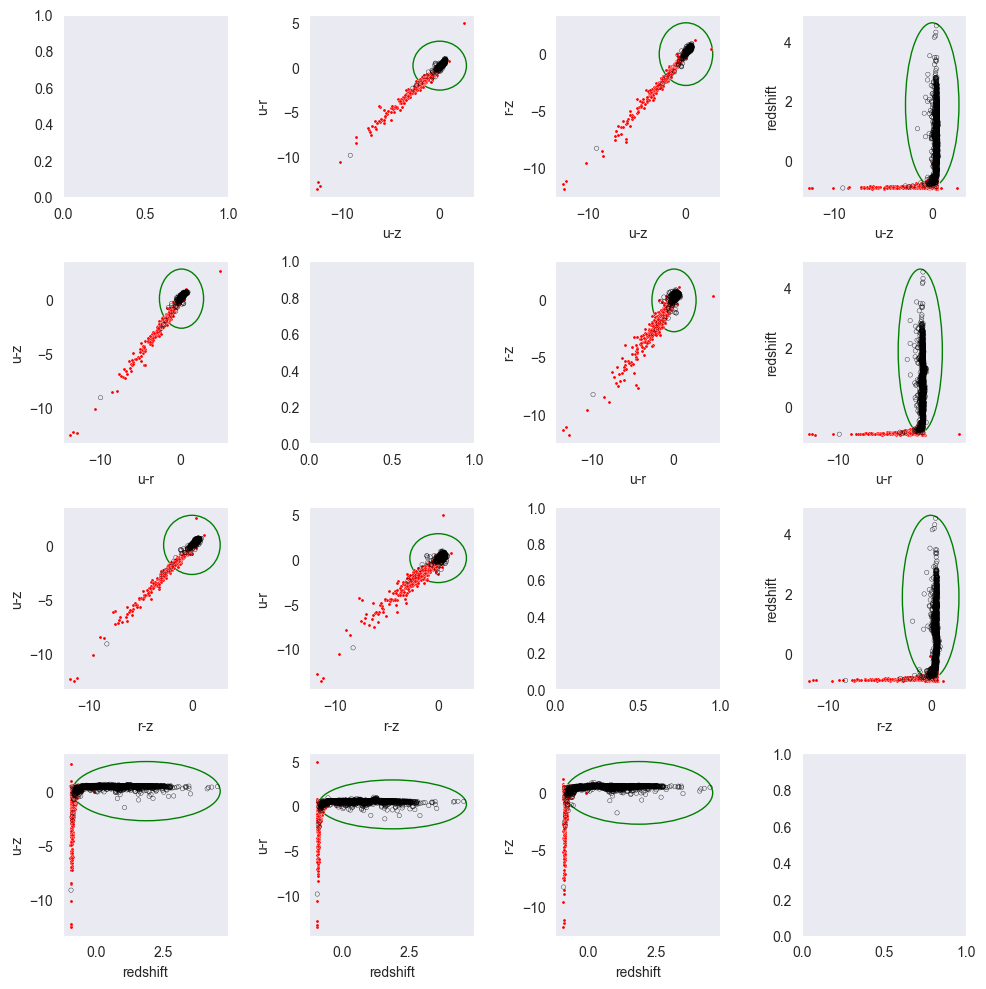

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame qso_g_df_norm with the necessary columns

# Set Seaborn style
sns.set_style("dark")

# Create a figure with subplots
fig, axs = plt.subplots(len(pred_columns_qso_g), len(pred_columns_qso_g), figsize=(10, 10))

# Loop over subplots
for i in range(len(pred_columns_qso_g)):
    for j in range(len(pred_columns_qso_g)):
        if i==j:
            continue
        ax = axs[i, j]
        ax.cla()
        
        # Plot the MEB circle
        circle = plt.Circle(tuple(c_qso_g[[i, j]]), r_qso_g, color='g', fill=False)
        ax.add_patch(circle)
        
        # Scatter plot for Red Dwarfs (GALAXY)
        sns.scatterplot(x=pred_columns_qso_g[i], y=pred_columns_qso_g[j], data=qso_g_df_norm[qso_g_df_norm['type'] == 'GALAXY'], color='r', ax=ax, s=5)
        
        # Scatter plot for White Dwarfs (QSO)
        sns.scatterplot(x=pred_columns_qso_g[i], y=pred_columns_qso_g[j], data=qso_g_df_norm[qso_g_df_norm['type'] == 'QSO'], color='none', edgecolor='black', ax=ax, s=10)
        
        ax.set_xlabel(pred_columns_qso_g[i])
        ax.set_ylabel(pred_columns_qso_g[j])
        
        # Set legend for the first subplot
        #if i == 0 and j == 0:
        #    ax.legend()

plt.tight_layout()
plt.show()

# Red Dwarfs vs. White Dwarfs

In [ ]:
red_dwarfs = pd.read_csv('datasets/red_dwarfs.csv')
white_dwarfs = pd.read_csv('datasets/white_dwarfs.csv')

red_dwarfs['type'] = 'red'
white_dwarfs['type'] = 'white'

red_dwarfs = red_dwarfs[red_dwarfs['subclass'].str.startswith('K') | red_dwarfs['subclass'].str.startswith('M')]
white_dwarfs = white_dwarfs[white_dwarfs['subclass'] == 'WD']

red_dwarfs = red_dwarfs.iloc[:2000]
white_dwarfs = white_dwarfs.iloc[:2000]

dwarfs = pd.concat([red_dwarfs, white_dwarfs], ignore_index=True)

dwarfs = dwarfs.dropna()

#dwarfs = dwarfs.sample(frac=1).reset_index(drop=True)

display(dwarfs.head())

,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,class,subclass,type
0,0.690362,2.639864,6.609772,9.040903,10.89239,STAR,K1,red
1,1.696024,5.127242,11.380340,15.288570,18.13893,STAR,K1,red
2,1.939370,6.556342,14.391160,19.006530,22.24492,STAR,K1,red
3,2.038488,9.414086,19.352240,25.074530,29.21216,STAR,K1,red
4,1.535014,5.447570,11.538370,15.077310,20.65042,STAR,K1,red


In [ ]:
dwarfs['u-g'] = dwarfs['spectroFlux_u'] - dwarfs['spectroFlux_g']
dwarfs['g-r'] = dwarfs['spectroFlux_g'] - dwarfs['spectroFlux_r']
dwarfs['r-i'] = dwarfs['spectroFlux_r'] - dwarfs['spectroFlux_i']
dwarfs['i-z'] = dwarfs['spectroFlux_i'] - dwarfs['spectroFlux_z']
dwarfs['u-r'] = dwarfs['spectroFlux_u'] - dwarfs['spectroFlux_r']
dwarfs['r-z'] = dwarfs['spectroFlux_r'] - dwarfs['spectroFlux_z']
dwarfs['u-z'] = dwarfs['spectroFlux_u'] - dwarfs['spectroFlux_z']

pred_columns = ['u-g', 'g-r', 'r-i', 'i-z']
train_set = dwarfs[dwarfs['type'] == "white"]